In [138]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
import ast

In [187]:
def count_sequences(viruses, gene):
    fig, ax = plt.subplots(len(viruses), figsize=(10,10))
    fig.tight_layout()

    for virus in viruses:
        alignment = '../../results/aligned_'+str(virus)+'_'+str(gene)+'.fasta'
        metadata = '../../results/metadata_'+str(virus)+'_'+str(gene)+'.tsv'

        meta_df = pd.read_csv(metadata, sep='\t')

        year_range = []
        with open(alignment, "r") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                try:
                    date = meta_df.loc[meta_df['strain']==record.id,'date'].values[0]
                    if date!='?':
                        year = int(date[0:4])
                        year_range.append(year)
                except:
                    pass
        num_years = max(year_range)-min(year_range)
        bin_3_years = round(num_years/3)
        virus_ax = viruses.index(virus)
#         ax[virus_ax].hist(year_range, bins=num_years)
        ax[virus_ax].hist(year_range, bins=bin_3_years)
        ax[virus_ax].set_title(str(virus)+' '+str(gene)+' sequences per year')


            

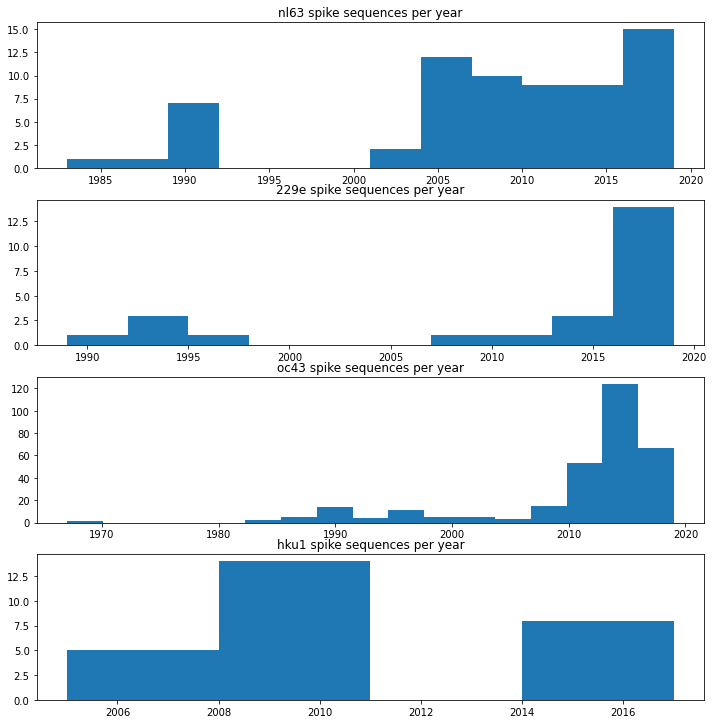

In [188]:
count_sequences(['nl63', '229e', 'oc43', 'hku1'], 'spike')

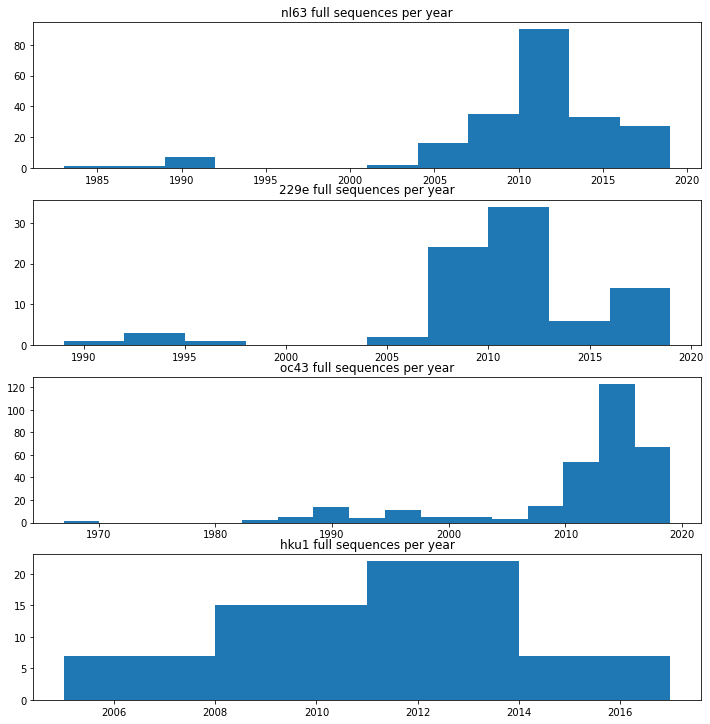

In [189]:
count_sequences(['nl63', '229e', 'oc43', 'hku1'], 'full')

In [ ]:
#     alignment_emma = '../../../cov-emma/Betacoronavirus1/results/masked.fasta'

#     count_emma = 0
#     with open(alignment_emma, "r") as handle:
#         for record in SeqIO.parse(handle, "fasta"):
#             count_emma+=1
#     print(count)
#     print(count_emma)